# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [206]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [207]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [208]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [209]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [210]:
# 2. Get the total drivers for each city type
# using pyper_data_df miscalculating (possibly due to the join); had to use the original csv for the sum 
total_driver_sum = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_sum

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [211]:
#  3. Get the total amount of fares for each city type
total_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [212]:
#  4. Get the average fare per ride for each city type. 
fare_per_ride_average = total_fare_sum / total_ride_count
fare_per_ride_average

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [213]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver_average = total_fare_sum / total_driver_sum
fare_per_driver_average

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [214]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({"Total Rides": total_ride_count,
            "Total Drivers": total_driver_sum,
            "Total Fares": total_fare_sum,
            "Average Fare per Ride": fare_per_ride_average,
            "Average Fare per Driver":fare_per_driver_average})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [215]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [216]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [217]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares
#  for each date where the indices are the city type and date.
# double brackets around the "fare" value makes it a dataframe prevents from having to convert series into dataframe.
type_date_fare_df = pyber_data_df.groupby(['type', 'date']).sum()[["fare"]]
type_date_fare_df

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [218]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# resetting creates single entries and allows for use in pivot function.
type_date_fare_df = type_date_fare_df.reset_index()
type_date_fare_df.head(10)

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [219]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
type_date_fare_pivot = type_date_fare_df.pivot(index="date", columns="type", values="fare")
type_date_fare_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [226]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
type_date_fare_filtered = type_date_fare_pivot.loc["2019-01-01":"2019-04-29"]
type_date_fare_filtered.head()

<ipython-input-226-16ff8fc6660b>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  type_date_fare_filtered = type_date_fare_pivot.loc["2019-01-01":"2019-04-29"]


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [227]:
# 5. Reset the index on the DataFrame you created in #4. This is needed to use the 'pivot()' function.
# resetting creates single entries and allows for use in pivot function.
type_date_fare_filtered = type_date_fare_filtered.reset_index()
type_date_fare_filtered.head()

type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:00,NaN,NaN,37.91
1,2019-01-01 00:46:00,NaN,47.74,NaN
2,2019-01-01 12:32:00,NaN,25.56,NaN
3,2019-01-01 14:40:00,NaN,NaN,5.42
4,2019-01-01 14:42:00,NaN,NaN,12.31


In [228]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# change date attribute from an object to datetime
# df.index = pd.to_datetime(df.index)
type_date_fare_pivot.index = pd.to_datetime(type_date_fare_pivot.index)
type_date_fare_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
2019-01-01 14:52:00,NaN,31.15,NaN
2019-01-01 17:22:00,NaN,NaN,42.11
2019-01-01 21:04:00,NaN,NaN,11.71
2019-01-01 02:07:00,NaN,24.07,NaN


In [229]:
# 7. Check that the datatype for the index is datetime using df.info()
# confirm the date changed to datetime
type_date_fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 138.3 KB


In [230]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_date_fare_weekly = type_date_fare_pivot.resample("W").sum()
type_date_fare_weekly.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


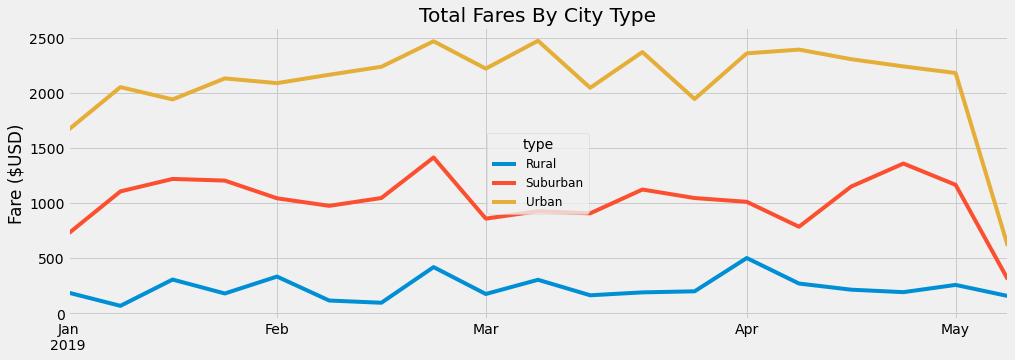

In [231]:
# Import the style from Matplotlib.
from matplotlib import style

# Plot from Weekly Pivot dataframe
type_date_fare_weekly.plot(figsize = (15, 5))

# Get the current Axes that df.plot() references
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel("Fare ($USD)")
ax.set_title("Total Fares By City Type")

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="center", title="type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Save the figure.
plt.savefig("analysis/Fig8.png")

plt.show()
